In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
#Making it a 1d list
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
#Making it a 1d list
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

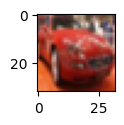

In [6]:
plt.figure(figsize=(1,5))
plt.imshow(x_train[5])

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot(x,y,index):
    plt.figure(figsize=(1,5))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

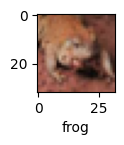

In [9]:
plot(x_test,y_test,5)

In [10]:
#Normalization
x_train = x_train/255
x_test = x_test/255

# Simple ANN

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(300,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(
    optimizer='SGD',
    loss =  'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8833 - accuracy: 0.3282
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6896 - accuracy: 0.4008
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6028 - accuracy: 0.4310
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5464 - accuracy: 0.4507
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5013 - accuracy: 0.4692


In [26]:
ypred = ann.predict(x_test)
ypred = [np.argmax(i) for i in ypred]
ypred[:5]

313/313 [==============================] - 0s 1ms/step


[3, 9, 8, 8, 4]

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, ypred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.29      0.41      1000
           1       0.60      0.55      0.57      1000
           2       0.34      0.35      0.35      1000
           3       0.41      0.20      0.27      1000
           4       0.42      0.33      0.37      1000
           5       0.42      0.34      0.38      1000
           6       0.38      0.73      0.50      1000
           7       0.62      0.40      0.49      1000
           8       0.52      0.65      0.58      1000
           9       0.40      0.69      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.44     10000
weighted avg       0.48      0.45      0.44     10000



# CNN
1. filter = no of features to extracted from the image 
2. kernal_size = filter matrix size
3. Maxpool = maxpooling size
4. Padding = To get the corner features

In [16]:


cnn = models.Sequential([
    layers.Conv2D(filters=32,strides=(1,1),kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((3,3),padding='SAME'),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=15,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    
    
    layers.Dense(32,activation='relu'),
    layers.Dense(32,activation='softmax')
])



cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8475 - accuracy: 0.3183
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4933 - accuracy: 0.4485
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3856 - accuracy: 0.4945
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3106 - accuracy: 0.5244
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2500 - accuracy: 0.5453
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2081 - accuracy: 0.5607
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1743 - accuracy: 0.5748
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1428 - accuracy: 0.5875
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1158 - accuracy: 0.5994
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [35]:
ypred = cnn.predict(x_test)
ypred = [np.argmax(i) for i in ypred]
ypred[:5]

313/313 [==============================] - 1s 3ms/step


[8, 8, 8, 8, 6]

In [36]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, ypred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.45      0.55      1000
           1       0.57      0.83      0.67      1000
           2       0.52      0.40      0.45      1000
           3       0.45      0.27      0.34      1000
           4       0.58      0.47      0.52      1000
           5       0.51      0.53      0.51      1000
           6       0.64      0.73      0.68      1000
           7       0.63      0.67      0.65      1000
           8       0.61      0.81      0.69      1000
           9       0.60      0.68      0.64      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.58      0.57     10000



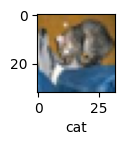

In [40]:
plot(x_test,y_test,0)

In [41]:
classes[y_test[0]]

'cat'